In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow.keras.layers import TextVectorization
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2024-05-06 08:46:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-05-06 08:46:37 (69.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"
unzip_data("nlp_getting_started.zip")

--2024-05-06 08:46:37--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.207, 142.250.148.207, 142.251.183.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.03s   

2024-05-06 08:46:37 (18.7 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df["text"].to_numpy(), train_df["target"].to_numpy(),test_size=0.1)

In [ ]:
text_vectorizer = TextVectorization(max_tokens=10000, output_mode="int", output_sequence_length=15)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
embedding = tf.keras.layers.Embedding(input_dim=10000,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=15)

In [ ]:
model = tf.keras.Sequential([
    text_vectorizer,
    embedding,
    tf.keras.layers.LSTM(128, return_sequences = True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])


In [ ]:
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
history = model.fit(train_sentences, train_labels, epochs=5, validation_data=(val_sentences, val_labels), verbose = 0)

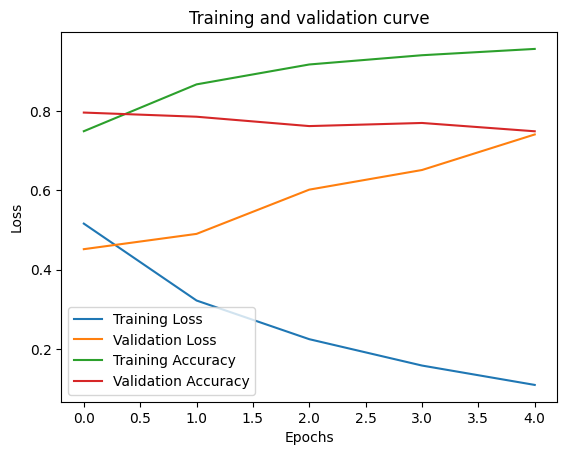

In [ ]:
plt.plot(history.history['loss'], label = "Training Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.plot(history.history['accuracy'], label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.title("Training and validation curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()